# Miguel Bautista

# Predicting Ames House Prices
Dataset from Kaggle ([House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques "House Prices: Advanced Regression Techniques | Kaggle"))   

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Data Dictionary ([Link](http://ww2.amstat.org/publications/jse/v19n3/Decock/DataDocumentation.txt))

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Loading the housing data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("Training dataset shape:", train.shape) # Contains sell price ("SalePrice") as last column!
print("Test dataset shape:", test.shape) # Has no SalePrice

trainY = train[['SalePrice']] # Creating a trainY dataframe
train_IDs = train.Id
test_IDs = test.Id

# Dropping ID
train.drop('Id', axis=1, inplace=True) 
test.drop('Id', axis = 1, inplace = True)

# Dropping SalePrice
# train.drop('SalePrice', axis=1, inplace=True)
print("New training dataset shape:", train.shape)

Training dataset shape: (1460, 81)
Test dataset shape: (1459, 80)
New training dataset shape: (1460, 80)


In [3]:
print("Are the columns the same in train and test?", (np.array_equal(train.columns, test.columns)))
# It is False because we have not dropped the SalePrice column yet, this will be done in a later step when dealing with outliers.

Are the columns the same in train and test? False


In [4]:
# Previewing dataset
Columns, Rows = train.shape
pd.set_option('max_columns', Rows)  # default is 20 columns
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Examining the features of the dataset (specifically for missing features)
There are 1460 rows and 81 columns in the training dataset.  
One column belongs to ID and the other is SalePrice.  
So we have 79 features.

In [5]:
total_missing = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


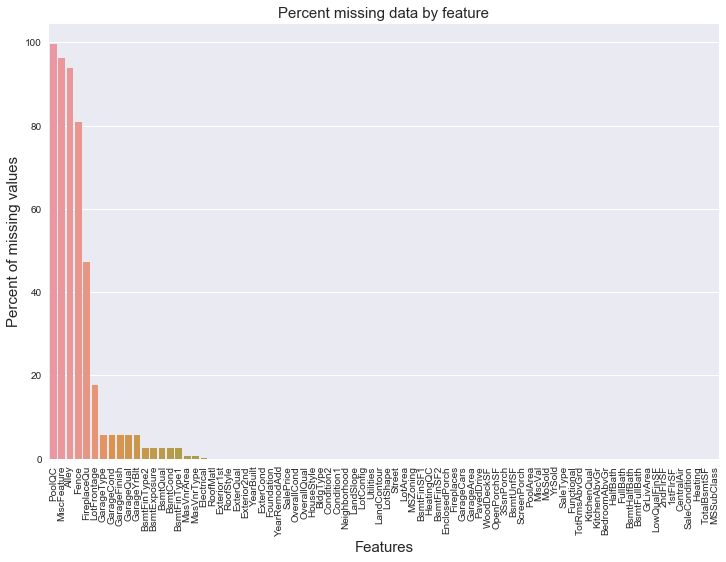

In [6]:
# Plotting missing data
f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.barplot(x = total_missing.index, y = percent * 100, data = missing_data)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15);

PoolQC, MiscFeature, Alley, Fence, FireplaceQu have a lot of missing values. Why?
Seems to be an alarming amount of missing values.  
For PoolQC, MiscFeature, Alley, Fence, FireplaceQu, NA is used to represent "no pool, miscellaneous feature, alley, fence, fireplace."



According to data documentation:
- PoolQC: NA means "no pool"
- MiscFeature : NA means "no misc feature"
- Alley : NA means "no alley access"
- Fence : NA means "no fence"
- FireplaceQu : NA means "no fireplace"
- GarageType: NA means "no garage"
- GarageFinish: NA means "no garage"
- GarageQual: NA means "no garage"
- GarageCond: NA means "no garage"
- BsmtFinType2: NA means "no basement"
- BsmtExposure: NA means "no basement"
- BsmtFinType1: NA means "no basement"
- BsmtCond: NA means "no basement"
- BsmtQual: NA means "no basement"
- MasVnrType: NA probably means "None" since most houses in the training dataset(864) do not have Masonry Veneer
    
    
#### Will impute the "missing" NA by changing it to "None." (for categorical columns)

In [7]:
imputedColumns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence',
                  'FireplaceQu', 'GarageType', 'GarageFinish',
                  'GarageQual', 'GarageCond', "BsmtFinType2",
                  "BsmtExposure", "BsmtFinType1", "BsmtCond",
                  "BsmtQual", "MasVnrType"] 

def impute_missing(df):
    for col in imputedColumns:
        df[col] = df[col].fillna('None')
        
    # Only a few missing values in the training set for these two columns.
    # Using 0, since if there is no garage, there is no year built. If no masonry veneer, there will be no area.
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0)


    # Only 1 missing value in the training set. Imputing most common value for 'Electrical' which is SBrkr
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
    
    
    return df

In [8]:
impute_missing(train)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [9]:
# Checking to see the percentages of missing data.
total_missing = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
LotFrontage,259,0.177397
SalePrice,0,0.000000
BsmtQual,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
MasVnrType,0,0.000000
MasVnrArea,0,0.000000
ExterQual,0,0.000000
ExterCond,0,0.000000
Foundation,0,0.000000


** Lot Frontage is the last feature that needs imputing **   
Lot Frontage (Continuous): Linear feet of street connected to property
- Almost 18% of data is missing here. Since the amount of the street connected to its property is probably similar to another house in the same neighborhood, I will impute the neighborhood's median LotFrontage.

In [10]:
train.groupby("Neighborhood")["LotFrontage"].describe()
train['LotFrontage'] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
train.isnull().sum().sort_values(ascending = False)[:5] # Confirm that there are no more missing values.

SalePrice        0
SaleCondition    0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
dtype: int64

There are also some additional columns that need number imputing.  
These columns will be imputed with 0, since having no garage would mean there is no year built, no area, no cars in garage.

### Must transform test dataset also.

In [11]:
total_missing = test.isnull().sum().sort_values(ascending = False)
percent = (test.isnull().sum() / test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(40)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageFinish,78,0.053461
GarageYrBlt,78,0.053461
GarageQual,78,0.053461


There are more features to impute here compared to the training dataset, but we can impute accordingly.
Such as MSZoning, KitchenQual  - imputing the most common event makes sense.

In [12]:
impute_missing(test)
test.isnull().sum().sort_values(ascending = False)[:18]

LotFrontage     227
MSZoning          4
Functional        2
Utilities         2
BsmtHalfBath      2
BsmtFullBath      2
KitchenQual       1
Exterior1st       1
BsmtFinSF1        1
Exterior2nd       1
GarageCars        1
GarageArea        1
BsmtFinSF2        1
SaleType          1
TotalBsmtSF       1
BsmtUnfSF         1
ExterCond         0
ExterQual         0
dtype: int64

In [13]:
zero_cols = ['GarageYrBlt', 'GarageArea', 'GarageCars',
 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']

# Imputing zero for columns that use numbers as measures (such as basement in square feet [BsmtFinSF])
for col in zero_cols:
    test[col] = test[col].fillna(0)

# Filling in the missing LotFrontage, accounts for 15% of missing data
test['LotFrontage'] = test.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

modeCols = ['MSZoning','Exterior1st', 'Exterior2nd', 'SaleType', 'Utilities', 'KitchenQual']
# there are only a few missing values for these columns, so imputing with the mode.
for col in modeCols:
    test[col] = test[col].fillna(test[col].mode()[0])
            
# NA probably means no subclass
test['MSSubClass'] = test['MSSubClass'].fillna("None")
# Functional - data dictionary says assume Typical
test['Functional'] = test['Functional'].fillna("Typ")


# Confirming that there are no more missing values
test.isnull().sum().sort_values(ascending = False)[:10]

SaleCondition    0
Foundation       0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
dtype: int64

In [14]:
# Note: Utilities <-- there is no variation in the test dataset
print("Train \n", train['Utilities'].value_counts())
print("Test \n", test['Utilities'].value_counts())

# There is variation in the training dataset, however it is not used in prediction though, so it can be dropped.

train.drop('Utilities', axis=1, inplace=True)
test.drop('Utilities', axis=1, inplace=True)

Train 
 AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Test 
 AllPub    1459
Name: Utilities, dtype: int64


#### Last thing to do is to convert MSSubClass into a string, as the numbers represent classification

In [15]:
train['MSSubClass'] = train['MSSubClass'].astype(str)
test['MSSubClass'] = test['MSSubClass'].astype(str)

### Sale Price Analysis
Looking into how the prices are distributed.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Number of missing sale prices: 0
Skew: 1.8828757597682129, Kurtosis: 6.536281860064529


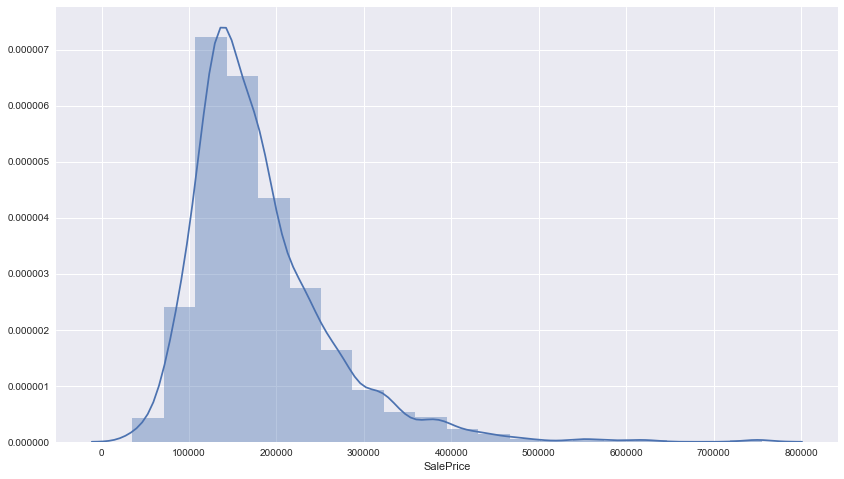

In [16]:
print(train.SalePrice.describe())
print()
print("Number of missing sale prices:", train.SalePrice.isnull().sum())
print("Skew: {}, Kurtosis: {}".format(train.SalePrice.skew(), train.SalePrice.kurtosis()))
plt.figure(figsize = (14, 8))
sns.distplot(train.SalePrice, bins = 20);

The dataset is slightly skewed to the right.

# Plotting sale price against different features.
Goal is to check if there are any price differences between houses depending on neighborhoods, number of bathrooms, year built, year sold, condition

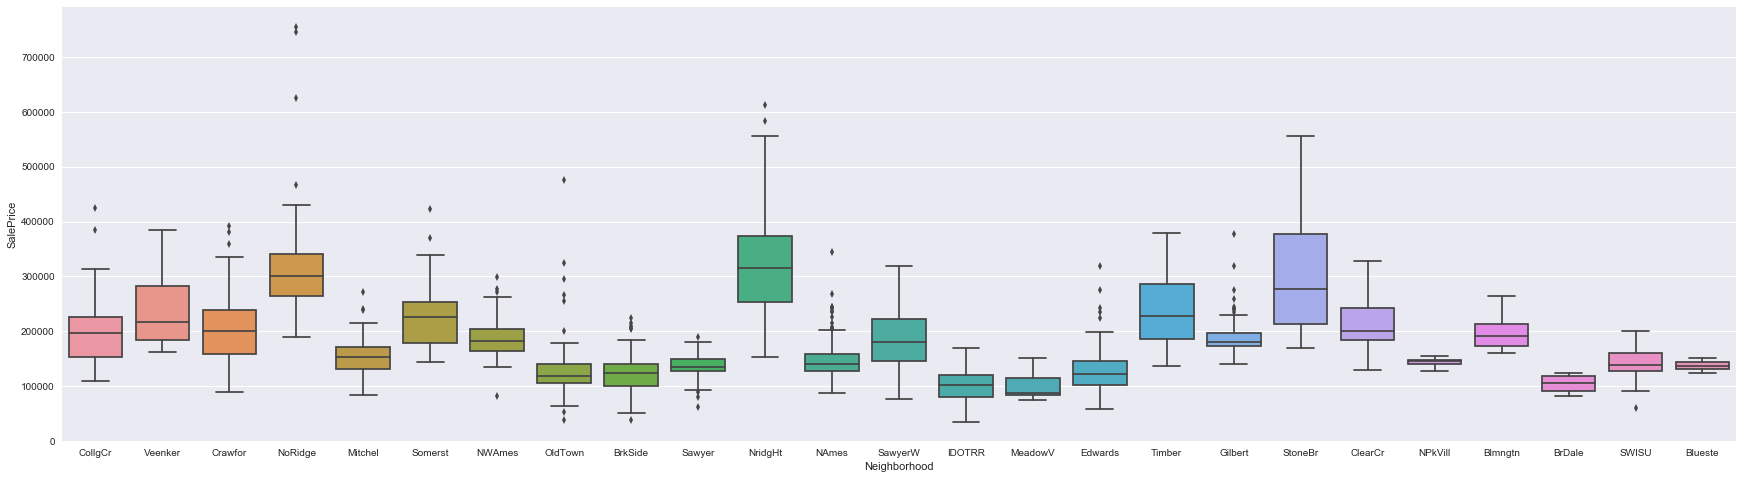

In [17]:
plt.figure(figsize = (30, 8))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = train);

Sale price does vary by neighborhood.

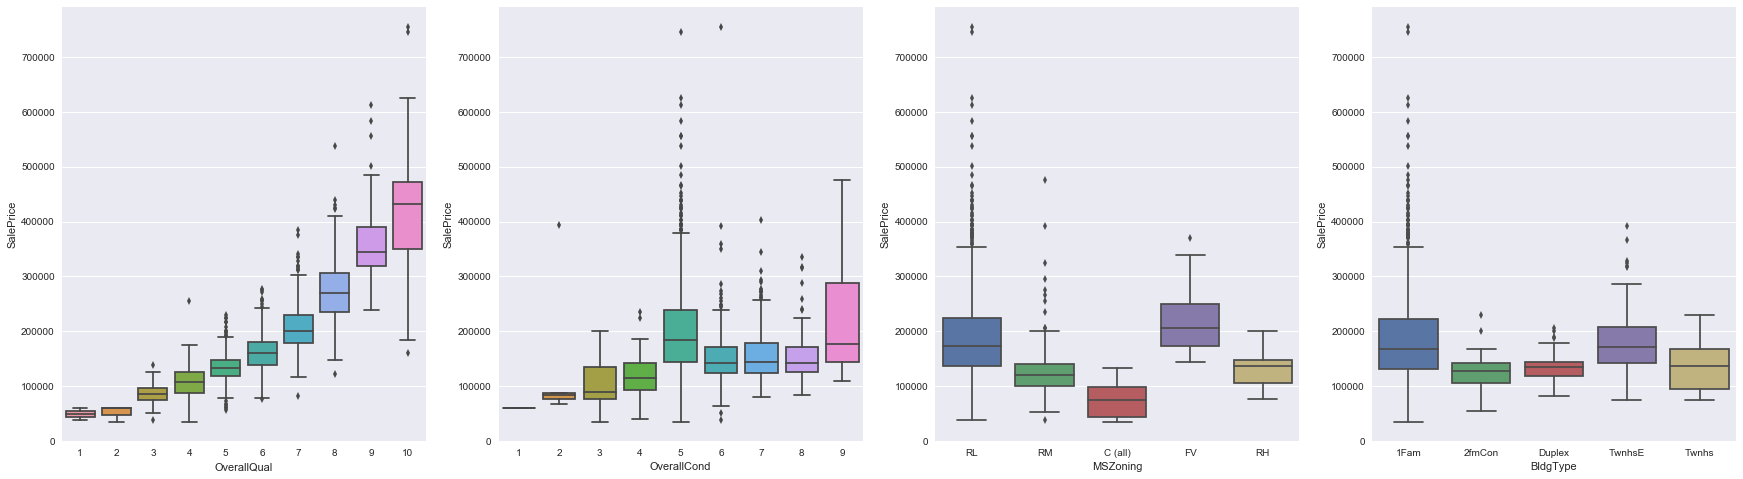

In [18]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(30, 8))

plt.figure(figsize = (21, 9));
sns.boxplot(x = train.OverallQual, y = train.SalePrice, ax = ax1);
sns.boxplot(x = train.OverallCond, y = train.SalePrice, ax = ax2);
sns.boxplot(x = train.MSZoning, y = train.SalePrice, ax = ax3);
sns.boxplot(x = train.BldgType, y = train.SalePrice, ax = ax4);

It appears that as quality of house increases, the price increases. Relationship looks kind of linear, positively correlated. The condition of house and sale price does not showcase any kind of correlation.

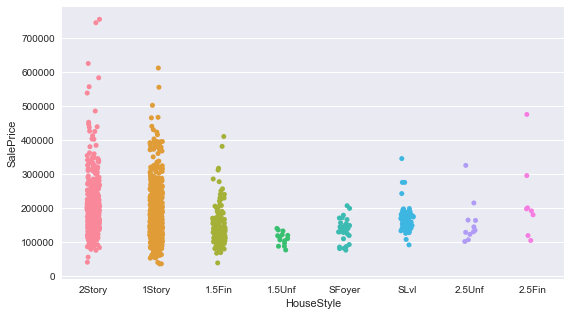

In [19]:
plt.figure(figsize = (9, 5))
sns.stripplot(x = train.HouseStyle, y = train.SalePrice, jitter = True);

Shows that the majority of houses in the dataset are 1 and 2 story houses.

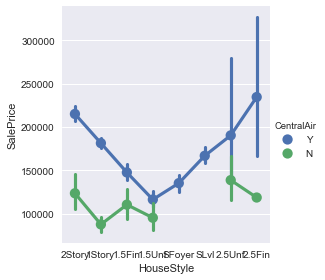

In [20]:
plt.figure(figsize = (16, 8));
sns.factorplot(x = 'HouseStyle', y = 'SalePrice', hue = 'CentralAir', data = train);

Houses that have central air conditioning do sell for noticeably more.

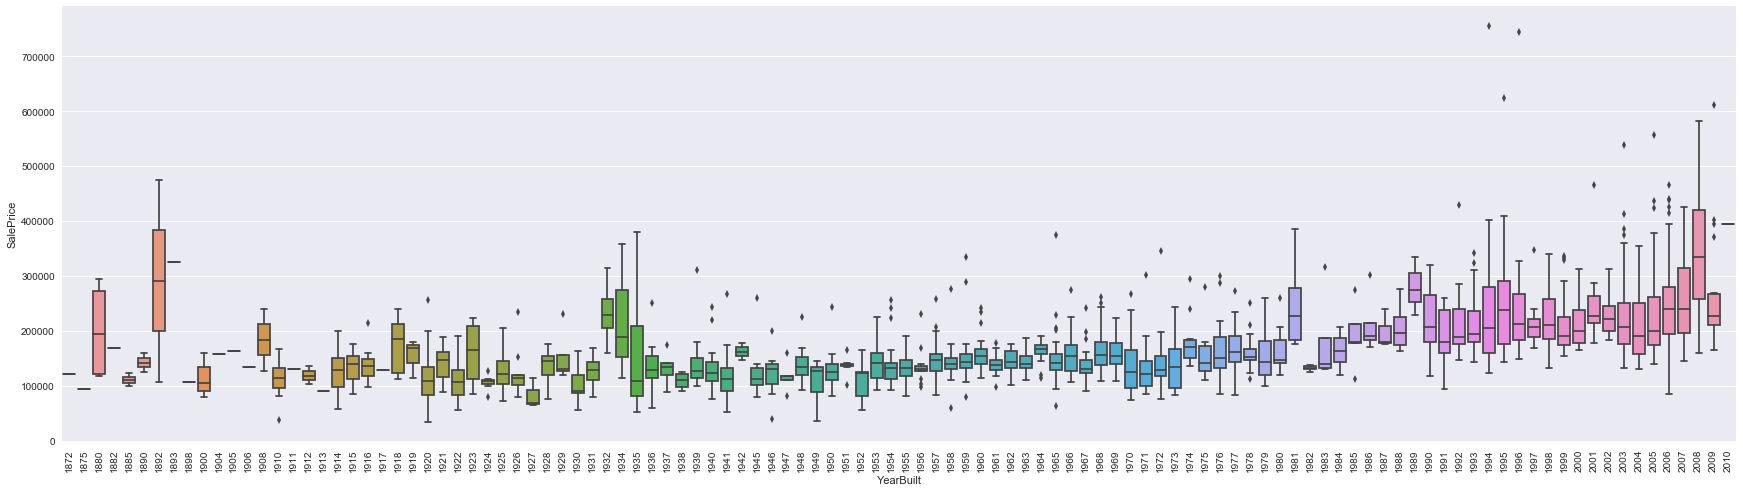

In [21]:
# Boxplot by Year Built
plt.figure(figsize = (30, 8))
sns.boxplot(x = train.YearBuilt, y = train.SalePrice);
plt.xticks(rotation = 90);

Showcases that house prices tend to go up, the newer the house is.

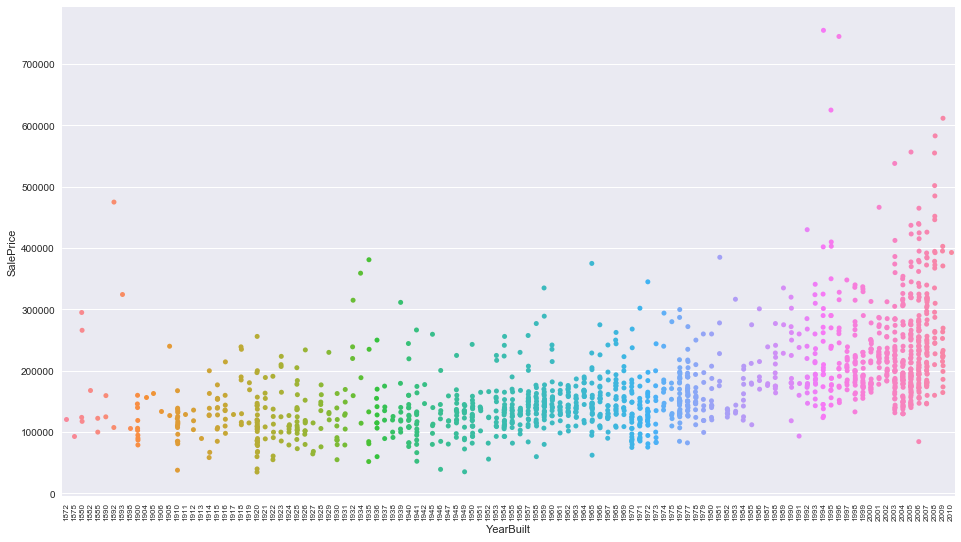

In [22]:
# Strip Plot by Year Built
plt.figure(figsize = (16,9))
sns.stripplot(x = train.YearBuilt, y = train.SalePrice, jitter = 0.04);
plt.xticks(fontsize = 8, rotation=90);

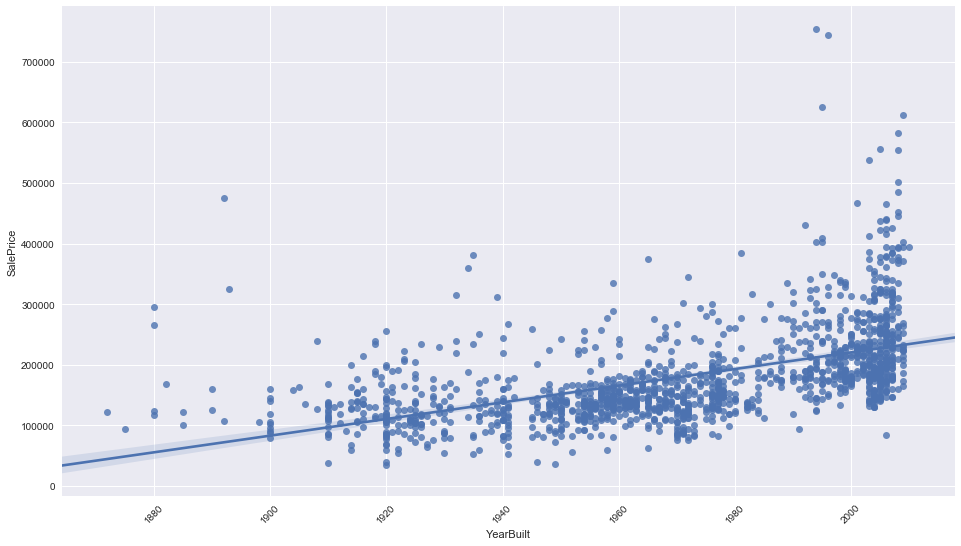

In [23]:
# Linear Regression Plot by Year Built
plt.figure(figsize = (16,9))
sns.regplot(x = train.YearBuilt, y = train.SalePrice);
plt.xticks(fontsize = 10, rotation = 45);

The stripplot and regplot of Sale Price vs. Year Built confirms that newer houses tend to have a higher sale price, and that a lot of houses are newer.

But just to confirm.

YearBuilt
2010     1
2009    18
2008    23
2007    49
2006    67
2005    64
2004    54
2003    45
2002    23
2001    20
2000    24
1999    25
1998    25
1997    14
1996    15
1995    18
1994    19
1993    17
1992    13
1991     5
Name: YearBuilt, dtype: int64

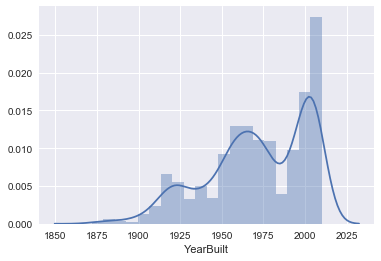

In [24]:
sns.distplot(train.YearBuilt, bins = 20);

train['YearBuilt'].groupby([train.YearBuilt]).agg('count').sort_index(ascending = False)[:20]

# NOTE: There are some outliers mentioned in the data dictionary. It should be in the SalePrice vs. GrLivArea plot.
    "There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students."

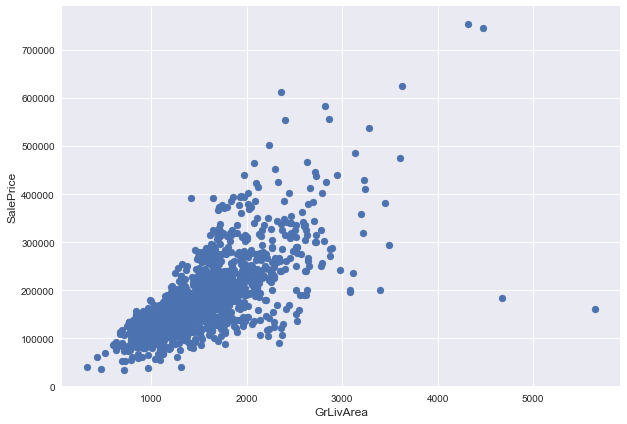

In [25]:
plt.figure(figsize = (10, 7))
plt.scatter(x = train.GrLivArea, y = trainY.SalePrice)
plt.ylabel('SalePrice', fontsize=12);
plt.xlabel('GrLivArea', fontsize=12);

#### I will just end up removing the two houses in the bottom right hand portion of the graph.

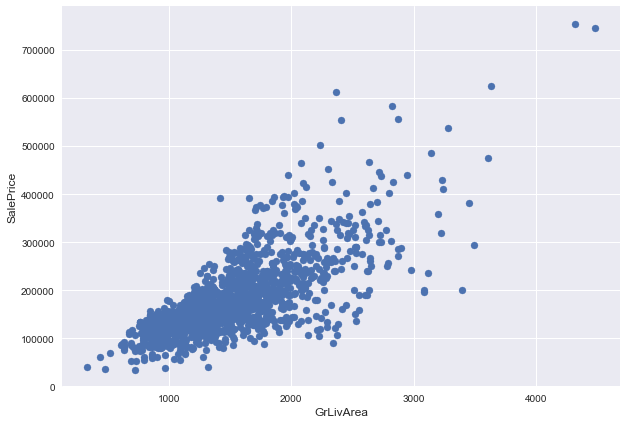

In [26]:
# Deleting outliers
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index)

# Check the graph again
plt.figure(figsize = (10, 7))
plt.scatter(x = train.GrLivArea, y = train.SalePrice)
plt.ylabel('SalePrice', fontsize=12);
plt.xlabel('GrLivArea', fontsize=12);

In [27]:
trainY = train[['SalePrice']] # Creating a trainY dataframe
train.drop('SalePrice', axis=1, inplace=True)
print("Are the columns the same in train and test?", (np.array_equal(train.columns, test.columns)))
trainY.head()

Are the columns the same in train and test? True


,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


# Creating a Baseline Model

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 78 columns):
MSSubClass       1458 non-null object
MSZoning         1458 non-null object
LotFrontage      1458 non-null float64
LotArea          1458 non-null int64
Street           1458 non-null object
Alley            1458 non-null object
LotShape         1458 non-null object
LandContour      1458 non-null object
LotConfig        1458 non-null object
LandSlope        1458 non-null object
Neighborhood     1458 non-null object
Condition1       1458 non-null object
Condition2       1458 non-null object
BldgType         1458 non-null object
HouseStyle       1458 non-null object
OverallQual      1458 non-null int64
OverallCond      1458 non-null int64
YearBuilt        1458 non-null int64
YearRemodAdd     1458 non-null int64
RoofStyle        1458 non-null object
RoofMatl         1458 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non-null object
MasVnrType       1458 n

One thing to note is that YearBuilt is still an int64.
Should this be converted to a categorical since newer houses don't guarantee higher prices?
- I will attempt that later after creating a baseline model.

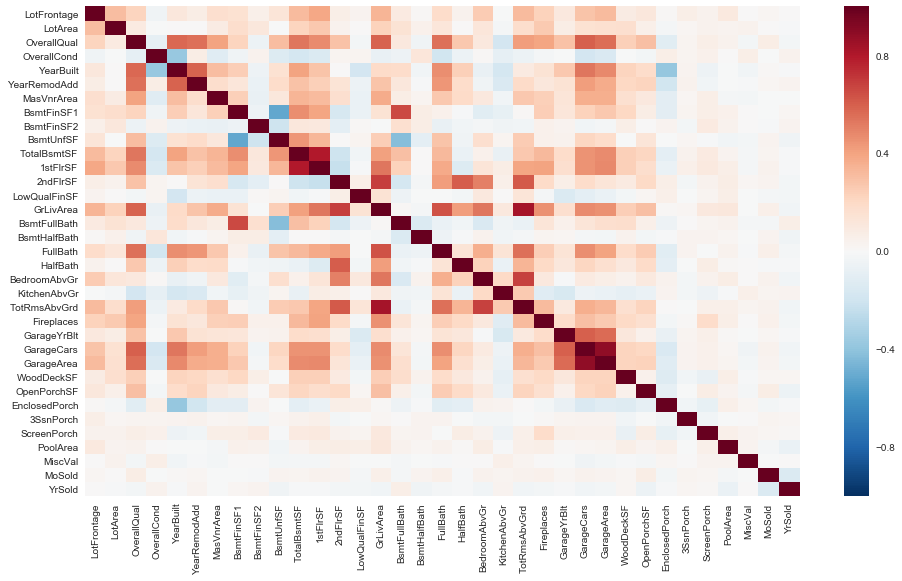

In [29]:
plt.figure(figsize = (16,9));
sns.heatmap(data=train.corr());

# Modeling
#### Import modeling tools

In [30]:
# Scoring stuff
from sklearn.metrics import roc_curve, auc, mean_squared_error, r2_score

# Import model selection tools
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

# Import models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet
import xgboost as xgb # XGBRegressor

from sklearn.preprocessing import LabelEncoder


/anaconda/envs/py35_ds_dt_16/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
def R2(df):
    scoring = 'r2'
    num_folds = 5
    seed = 10
    kfold = KFold(n_splits = num_folds, random_state = seed)

    results = []
    names = []
    models = []

    models.append( ('LinearRegression', LinearRegression()) )
    models.append( ('RandomForestRegressor', RandomForestRegressor(random_state = seed)) )
    models.append( ('GradientBoostingRegressor', GradientBoostingRegressor(random_state = seed)) )
    models.append( ('Lasso', Lasso(random_state = seed)) )
    models.append( ('Ridge', Ridge(random_state = seed)) ) 
    models.append( ('ElasticNet', ElasticNet(random_state = seed)) )
    models.append( ('XGBRegressor', xgb.XGBRegressor(seed = seed)) )
    

   
    for name, model in models:
        kfold = KFold(n_splits = num_folds, random_state = seed)

        names.append(name)
        model.fit(df, trainY.SalePrice)

        scores = cross_val_score(model, df, trainY.SalePrice, cv = kfold, scoring = scoring)
        results.append(scores)

        msg = "{}: R2: {} ({})".format(name, scores.mean(), scores.std())
        
        print(msg)
        print()
                
    return results

def RMSE(df):
    scoring = 'neg_mean_squared_error'
    num_folds = 5
    seed = 10
    kfold = KFold(n_splits = num_folds, random_state = seed)

    results = []
    names = []
    models = []

    models.append( ('LinearRegression', LinearRegression()) )
    models.append( ('RandomForestRegressor', RandomForestRegressor(random_state = seed)) )
    models.append( ('GradientBoostingRegressor', GradientBoostingRegressor(random_state = seed)) )
    models.append( ('Lasso', Lasso(random_state = seed)) )
    models.append( ('Ridge', Ridge(random_state = seed)) ) 
    models.append( ('ElasticNet', ElasticNet(random_state = seed)) )
    models.append( ('XGBRegressor', xgb.XGBRegressor(seed = seed)) )

   
    for name, model in models:
        kfold = KFold(n_splits = num_folds, random_state = seed)

        names.append(name)
        model.fit(df, trainY.SalePrice)

        scores = np.sqrt(-cross_val_score(model, df, trainY.SalePrice, cv = kfold, scoring = scoring))
        results.append(scores)

        msg = "{}: RMSE: {} ({})".format(name, scores.mean(), scores.std())
        
              
        print(msg)
        print()
                
    return results


# RMSE
def rmse(model):
    scoring = 'neg_mean_squared_error'
    num_folds = 5
    seed = 10

    kf = KFold(n_splits = num_folds, shuffle = True, random_state = seed).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, trainY.SalePrice, scoring = scoring, cv = kf))
   
    return rmse

### Need to convert the string columns into numbers somehow.
I will use get dummies to do that.

In [32]:
df_object = train.select_dtypes(include=['object'])
print("Number of categorical columns:", len(df_object.columns))
df_object.head(10)

Number of categorical columns: 43


,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,70,RL,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,60,RL,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
5,50,RL,Pave,None,IR1,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,Wood,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,None,Attchd,Unf,TA,TA,Y,None,MnPrv,Shed,WD,Normal
6,20,RL,Pave,None,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
7,60,RL,Pave,None,IR1,Lvl,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,Shed,WD,Normal
8,50,RM,Pave,None,Reg,Lvl,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,FuseF,TA,Min1,TA,Detchd,Unf,Fa,TA,Y,None,None,None,WD,Abnorml
9,190,RL,Pave,None,Reg,Lvl,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,Gd,TA,Y,None,None,None,WD,Normal


# Trying to notice if there are any columns that have no variation.
#### Since earlier I dropped the "Utilities" column since it had no variation in the test set.

In [33]:
df_object.describe()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458
unique,15,5,2,3,4,4,5,3,25,9,8,5,8,6,7,15,16,4,4,5,6,5,5,5,7,7,6,5,2,5,4,7,6,7,4,6,6,3,4,5,5,9,6
top,20,RL,Pave,None,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,None,Attchd,Unf,TA,TA,Y,None,None,None,WD,Normal
freq,536,1149,1452,1367,925,1311,1051,1380,225,1260,1444,1218,726,1141,1433,515,504,872,906,1280,645,649,1309,953,430,1254,1426,739,1363,1333,735,1358,690,869,605,1309,1324,1338,1452,1177,1404,1267,1198


Overall looks fine, some parts have heavy class imbalance (1452 have paved streets, 6 do not), but overall nothing that has "zero" variation.

In [34]:
categorical_Cols = list(df_object.columns) # Inputting the categorical columns into a list

In [35]:
train.shape

(1458, 78)

In [36]:
from sklearn.preprocessing import LabelEncoder

# process columns, apply LabelEncoder to categorical features
for c in categorical_Cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

# shape        
print('Shape all_data: {}'.format(train.shape))

Shape all_data: (1458, 78)


In [37]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,9,3,65.0,8450,1,1,3,3,4,0,5,2,2,0,5,7,5,2003,2003,1,0,12,13,1,196.0,2,4,2,2,4,3,2,706,6,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,3,4,1,0,2,2008,8,4
1,4,3,80.0,9600,1,1,3,3,2,0,24,1,2,0,2,6,8,1976,1976,1,0,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,3,4,1,0,5,2007,8,4
2,9,3,68.0,11250,1,1,0,3,4,0,5,2,2,0,5,7,5,2001,2002,1,0,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,3,4,1,0,9,2008,8,4
3,10,3,60.0,9550,1,1,0,3,0,0,6,2,2,0,5,7,5,1915,1970,1,0,13,15,2,0.0,3,4,0,4,1,3,0,216,6,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,3,4,1,0,2,2006,8,0
4,9,3,84.0,14260,1,1,0,3,2,0,15,2,2,0,5,8,5,2000,2000,1,0,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,3,4,1,0,12,2008,8,4


Dataframe appears to be transformed into all numbers.

In [38]:
R2(train)

LinearRegression: R2: 0.8710757651066224 (0.021498929789562932)

RandomForestRegressor: R2: 0.8771781390381663 (0.013266794764546615)

GradientBoostingRegressor: R2: 0.9129438824268732 (0.00920364824568183)

Lasso: R2: 0.8711814706832215 (0.021398932381608584)

Ridge: R2: 0.8731217926794935 (0.01955077892204452)

ElasticNet: R2: 0.8677962988580783 (0.020848084567135387)

XGBRegressor: R2: 0.9107256855977981 (0.008852405890367485)



[array([ 0.85003399,  0.90564291,  0.88154041,  0.87083038,  0.84733114]),
 array([ 0.86821106,  0.90173023,  0.86431252,  0.87210335,  0.87953354]),
 array([ 0.90261787,  0.92682409,  0.90297999,  0.91763664,  0.91466082]),
 array([ 0.85018084,  0.90567383,  0.88151138,  0.87085469,  0.84768661]),
 array([ 0.85462732,  0.90613672,  0.88103269,  0.87098821,  0.85282402]),
 array([ 0.84979625,  0.90390547,  0.87181675,  0.86865453,  0.8448085 ]),
 array([ 0.89820599,  0.92267304,  0.90312082,  0.91408078,  0.91554779])]

In [39]:
RMSE(train)

LinearRegression: RMSE: 28267.57124867042 (2673.38042257635)

RandomForestRegressor: RMSE: 27689.146669245576 (2458.383162047499)

GradientBoostingRegressor: RMSE: 23335.532584810942 (2234.200958781923)

Lasso: RMSE: 28256.719538675603 (2664.252793545035)

Ridge: RMSE: 28058.94468117291 (2526.891626022938)

ElasticNet: RMSE: 28654.586373518214 (2829.696435705622)

XGBRegressor: RMSE: 23620.730203123436 (2036.6791059526074)



[array([ 28804.62538558,  24915.70564209,  29961.54957572,  25609.78271549,
         32046.19292448]),
 array([ 27002.58163201,  25427.04476494,  32066.31505879,  25483.27753267,
         28466.51435782]),
 array([ 23211.6195781 ,  21941.68551087,  27115.01306521,  20449.97251924,
         23959.37225063]),
 array([ 28790.51798574,  24911.62242814,  29965.22059976,  25607.37294801,
         32008.86373172]),
 array([ 28360.06349636,  24850.42236857,  30025.68899558,  25594.1324167 ,
         31464.41612866]),
 array([ 28827.44812608,  25144.05142649,  31166.98600093,  25824.57896801,
         32309.86734609]),
 array([ 23731.59404768,  22555.44343544,  27095.32660643,  20886.74983344,
         23834.53709263])]

The leaderboard for the Kaggle competition uses RMSE scoring, and generally it is with values less than 0.2.
There is a lot of work to do.

In [40]:
#Changing OverallCond into a categorical variable
train['OverallCond'] = train['OverallCond'].astype(str)
#Year and month sold are transformed into categorical features.
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

newCols = ['OverallCond', 'YrSold', 'MoSold']

for c in newCols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

In [41]:
R2(train)

LinearRegression: R2: 0.8709531568936641 (0.021116279610611303)

RandomForestRegressor: R2: 0.869727018567643 (0.016303852183550734)

GradientBoostingRegressor: R2: 0.9127885250929818 (0.008278342392525813)

Lasso: R2: 0.8710606727210021 (0.021018082096988383)

Ridge: R2: 0.8730295178386734 (0.019187933236342495)

ElasticNet: R2: 0.8677647406824145 (0.02051554451541515)

XGBRegressor: R2: 0.9104403674453522 (0.00802390145496813)



[array([ 0.85005103,  0.90557715,  0.88037799,  0.87026681,  0.8484928 ]),
 array([ 0.8752097 ,  0.89725159,  0.85881456,  0.84923917,  0.86812008]),
 array([ 0.90158998,  0.92517117,  0.9058922 ,  0.91579204,  0.91549724]),
 array([ 0.85019644,  0.90560752,  0.88035223,  0.87029175,  0.84885542]),
 array([ 0.85461962,  0.9060718 ,  0.8798802 ,  0.87042661,  0.85414936]),
 array([ 0.8495755 ,  0.90373831,  0.87114392,  0.8682312 ,  0.84613477]),
 array([ 0.89887988,  0.92186187,  0.9042788 ,  0.91364523,  0.91353605])]

In [42]:
RMSE(train)

LinearRegression: RMSE: 28285.03962170137 (2645.3732894725345)

RandomForestRegressor: RMSE: 28487.471909874246 (2500.3691487332153)

GradientBoostingRegressor: RMSE: 23349.24970893267 (1999.4460940337187)

Lasso: RMSE: 28273.95370493511 (2636.2883890810162)

Ridge: RMSE: 28072.561643623754 (2499.7585200952553)

ElasticNet: RMSE: 28660.176625640295 (2795.772048503775)

XGBRegressor: RMSE: 23663.125724515106 (1964.3974239539828)



[array([ 28802.9884881 ,  24924.38552875,  30108.19355734,  25665.59015924,
         31924.04037509]),
 array([ 26275.81627865,  26000.00735666,  32709.5158732 ,  27667.50334204,
         29784.51669882]),
 array([ 23333.79983549,  22188.11484831,  26704.96244495,  20677.70227561,
         23841.66914031]),
 array([ 28789.01981687,  24920.37692558,  30111.43532997,  25663.1225572 ,
         31885.81389506]),
 array([ 28360.81493161,  24859.01505495,  30170.77475217,  25649.77818734,
         31322.42529206]),
 array([ 28848.62331472,  25165.91124345,  31248.6752199 ,  25866.16281105,
         32171.51053907]),
 array([ 23652.91096161,  22673.44003559,  26932.9064878 ,  20939.62339848,
         24116.7477391 ])]

In [43]:
cols = ['Neighborhood', 'LotFrontage', 'YearBuilt', 'OverallQual', 'CentralAir', 'GrLivArea']
train_v2 = train[cols]
RMSE(train_v2)

LinearRegression: RMSE: 37652.31586422828 (3000.3918121659462)

RandomForestRegressor: RMSE: 32867.753811429335 (2664.3530645125725)

GradientBoostingRegressor: RMSE: 30251.95508031312 (1394.689368705517)

Lasso: RMSE: 37652.27379382694 (3000.487940222559)

Ridge: RMSE: 37651.05824037996 (3001.0059971480614)

ElasticNet: RMSE: 38487.19611487974 (2931.2779716664136)

XGBRegressor: RMSE: 30387.576453533948 (1834.2160281648198)



[array([ 33859.47691335,  35401.43117069,  42155.62699289,  36991.89298763,
         39853.15125658]),
 array([ 31415.2837258 ,  33067.74002746,  36219.45267132,  28663.23067632,
         34973.06195624]),
 array([ 29397.03341941,  30841.20755372,  30934.30820157,  28031.74033915,
         32055.48588771]),
 array([ 33859.77307441,  35400.91526152,  42155.58943214,  36991.37939797,
         39853.71180309]),
 array([ 33861.10752454,  35397.00137654,  42154.9001438 ,  36986.73542555,
         39855.54673148]),
 array([ 35110.25067961,  36231.65472385,  42631.2319351 ,  37207.81725707,
         41255.02597876]),
 array([ 28622.24603552,  30903.32014587,  32249.53796886,  27869.49428014,
         32293.28383727])]

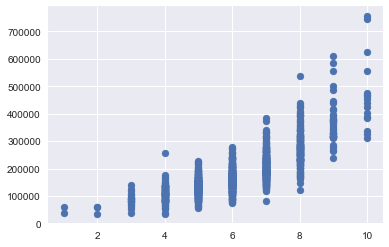

In [44]:
plt.scatter(x = 'OverallQual', y = trainY.SalePrice, data  = train);

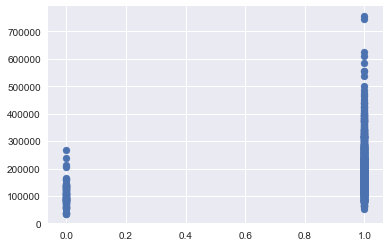

In [45]:
plt.scatter(x = 'CentralAir', y = trainY.SalePrice, data  = train);

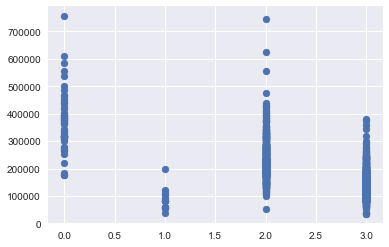

In [46]:
plt.scatter(x = 'ExterQual', y = trainY.SalePrice, data  = train);

In [47]:
# train2 = train.copy()
# z = train2.apply(lambda s: trainY.corrwith(s))
# print(z.max().sort_values(ascending = False)[:10])